# **생체 신호 데이터 분석 실습**
## VitalDB open dataset을 활용하여 시계열 데이터 및 측정값을 분석합니다.
## [1] 데이터 준비
## [2] 데이터셋 생성
## [3] 인공지능 모델 생성 및 확인

In [ ]:
!pip install vitaldb
!pip install tableone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.1 MB/s eta 0:00:00


## [1] 데이터 준비

1.   환자의 임상 정보
2.   시계열 데이터
3.   측정값 데이터
4.   분석하고자하는 케이스 선택


---



1.   환자의 임상 정보


---








In [ ]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
print("columns:", df_cases.columns, '\n')
df_cases.head(10)

columns: Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
5,6,5586,0,5145,-51,4749.0,2649,4449,-300600,131400,...,0,70,0.0,100,40,0,5,0,0,0
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
7,8,4328,0,5918,-748,5732.0,752,4952,-219720,212280,...,0,0,0.0,0,70,0,0,0,0,0
8,9,2008,0,4481,-481,4499.0,899,3299,-135900,36900,...,0,0,0.0,0,50,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600


In [ ]:
df_cases[['preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr']].describe()

,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr
count,6047.00000,6047.000000,5998.000000,5986.000000,5765.000000,5767.000000,6010.000000,6016.000000,6022.000000,6024.000000,6023.000000,6016.000000
mean,12.83319,241.437738,100.439980,32.884146,140.026366,4.196411,115.644759,4.063780,32.436068,30.276062,16.160883,1.080918
std,1.98949,84.948955,15.349064,8.519264,2.895233,0.408209,42.040397,0.518467,151.277006,100.936718,10.728721,1.593352
min,3.50000,5.000000,9.000000,19.200000,111.000000,2.500000,44.000000,0.600000,2.000000,1.000000,3.000000,0.100000
25%,11.60000,191.000000,94.000000,30.100000,139.000000,3.900000,94.000000,3.800000,17.000000,13.000000,11.000000,0.660000
50%,13.00000,235.000000,101.000000,32.100000,140.000000,4.200000,103.000000,4.200000,20.000000,18.000000,14.000000,0.780000
75%,14.20000,283.000000,109.000000,34.400000,142.000000,4.400000,122.000000,4.400000,26.000000,27.000000,17.000000,0.940000
max,20.20000,1156.000000,159.000000,400.000000,150.000000,8.400000,525.000000,5.300000,5018.000000,2621.000000,127.000000,25.620000


In [ ]:
from tableone import TableOne

table1df = df_cases[['age','sex', 'height', 'weight', 'bmi', 'asa']]
categorical = ['sex','asa']
continuous = ['age', 'height','weight','bmi']

table1 = TableOne(df_cases, columns=categorical + continuous,
                  categorical=categorical)

# Print the table
print(table1.tabulate(tablefmt="github"))

|                   |      | Missing   | Overall     |
|-------------------|------|-----------|-------------|
| n                 |      |           | 6388        |
| sex, n (%)        | F    |           | 3145 (49.2) |
|                   | M    |           | 3243 (50.8) |
| asa, n (%)        | 1.0  |           | 1792 (28.1) |
|                   | 2.0  |           | 3699 (57.9) |
|                   | 3.0  |           | 703 (11.0)  |
|                   | 4.0  |           | 48 (0.8)    |
|                   | 6.0  |           | 13 (0.2)    |
|                   | None |           | 133 (2.1)   |
| age, mean (SD)    |      | 0         | 57.3 (15.0) |
| height, mean (SD) |      | 0         | 162.2 (9.9) |
| weight, mean (SD) |      | 0         | 61.5 (11.9) |
| bmi, mean (SD)    |      | 0         | 23.3 (3.6)  |


---


2.   환자의 시계열 데이터 (Track 형태)

###### 시계열 데이터 종류를 `tname`에서 확인합니다.
###### 전체 데이터 : https://vitaldb.net/docs/?documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak#h.d0wofkno1fxp)
---

In [ ]:
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_trks.head(10)


,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
5,1,BIS/SQI,087670cd3f03109ff5028f268587a9801865afca
6,1,BIS/SR,5154b6395a8636ea82d0e2648f2957227f0ad816
7,1,BIS/TOTPOW,11785e179322dd451895c9d97f8b3c40720416b4
8,1,Primus/AWP,37cdb593a215fe148d994485a93c77d8cc6a6008
9,1,Primus/CO2,c39466fa9b7f231e1f26cdccb8ccf8fbde782459


In [ ]:
cases = df_trks['caseid'].loc[df_trks['tname']=='BIS/BIS'].values
print("BIS cases", len(cases), "\n")

cases = df_trks['caseid'].loc[df_trks['tname']=='BIS/BIS'].values
print("BIS cases", len(cases), "\n")

BIS cases 5867 

BIS cases 5867 



---



3.   환자의 측정값 데이터 (단수/다수 측정 가능)


---

In [ ]:
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results
df_labs.head(10)


,caseid,dt,name,result
0,1,594470,alb,2.9
1,1,399575,alb,3.2
2,1,12614,alb,3.4
3,1,137855,alb,3.6
4,1,399575,alt,12.0
5,1,137855,alt,16.0
6,1,594470,alt,17.0
7,1,12614,alt,20.0
8,1,12611,aptt,28.0
9,1,399575,ast,16.0


In [ ]:
df_labs['name'].unique()

array(['alb', 'alt', 'aptt', 'ast', 'bun', 'cl', 'cr', 'crp', 'fib',
       'gfr', 'gluc', 'hb', 'hco3', 'hct', 'ica', 'k', 'lac', 'na',
       'pco2', 'ph', 'plt', 'po2', 'pt%', 'ptinr', 'ptsec', 'sao2',
       'tbil', 'tprot', 'wbc', 'be', 'p', 'esr', 'ccr', 'ammo'],
      dtype=object)

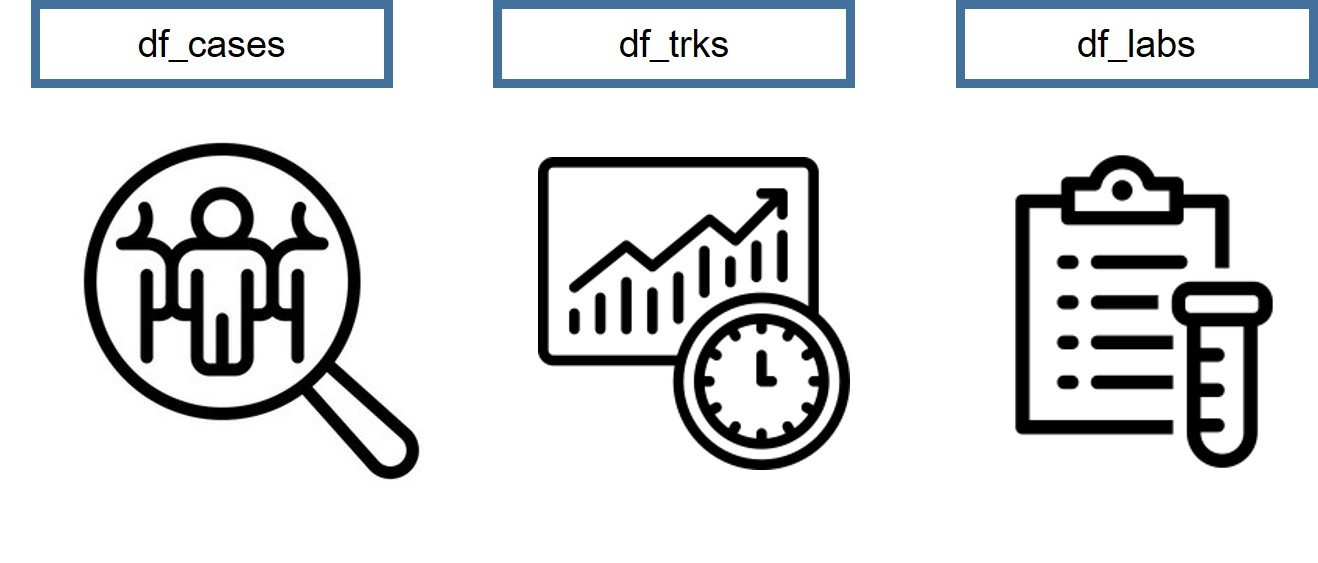



---


4.  분석하고자하는 케이스 선택

[약물 효과 예측 인공지능 모델 ]

*   2시간 이상
*   전신 마취
*   18세 이상
*   PPF20_VOL, RFTN20_VOL, PPF20_CE, RFTN20_CE, BIS 트랙이 존재
*   몸무게 35 kg 이상

---



In [ ]:
caseids = list(
  set(df_trks.loc[df_trks['tname'] == 'Orchestra/PPF20_VOL', 'caseid']) & ## loc를 사용하는게 아래보다 빠름.
  set(df_trks[df_trks['tname'] == 'Orchestra/RFTN20_VOL']['caseid']) &
  set(df_trks[df_trks['tname'] == 'Orchestra/PPF20_CE']['caseid']) &
  set(df_trks[df_trks['tname'] == 'Orchestra/RFTN20_CE']['caseid']) &
  set(df_trks[df_trks['tname'] == 'BIS/BIS']['caseid']) &
  set(df_cases[df_cases['age'] > 18]['caseid']) &
  set(df_cases[df_cases['weight'] > 35]['caseid']) &
  set(df_cases[df_cases['caseend'] > 7200]['caseid']) &   ## 2시간 이상의 수술.
  set(df_cases[df_cases['ane_type'] == 'General']['caseid'])  ## 전신 마취
  )
np.random.shuffle(caseids)
print(len(caseids))

2225


## [2] 데이터셋 생성


1.   결측치 처리
2.   전체 데이터셋 구성
3.   정규화 및 Train / Test 데이터 나누기


---


1.   결측치 처리 : vitaldb library 이용하여 하나의 케이스를 그려보고 전처리 진행


---





In [ ]:
caseid = 5180

# 20초 간격으로 Propofol 및 BIS 데이터 추출
import vitaldb
tracknames = ['Orchestra/PPF20_VOL', 'BIS/BIS']
vals = vitaldb.load_case(caseid, tracknames, 20)

print(vals.shape) # Matrix shape 확인
print()
(vals[:10]) # 데이터 일부 확인

(888, 2)



array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.38199997,  0.        ],
       [ 3.97900009,  0.        ],
       [ 3.97900009, 75.40000153],
       [ 3.97900009, 60.90000153],
       [ 3.97900009, 43.59999847],
       [ 4.0710001 , 44.20000076],
       [ 4.3039999 , 44.5       ]])

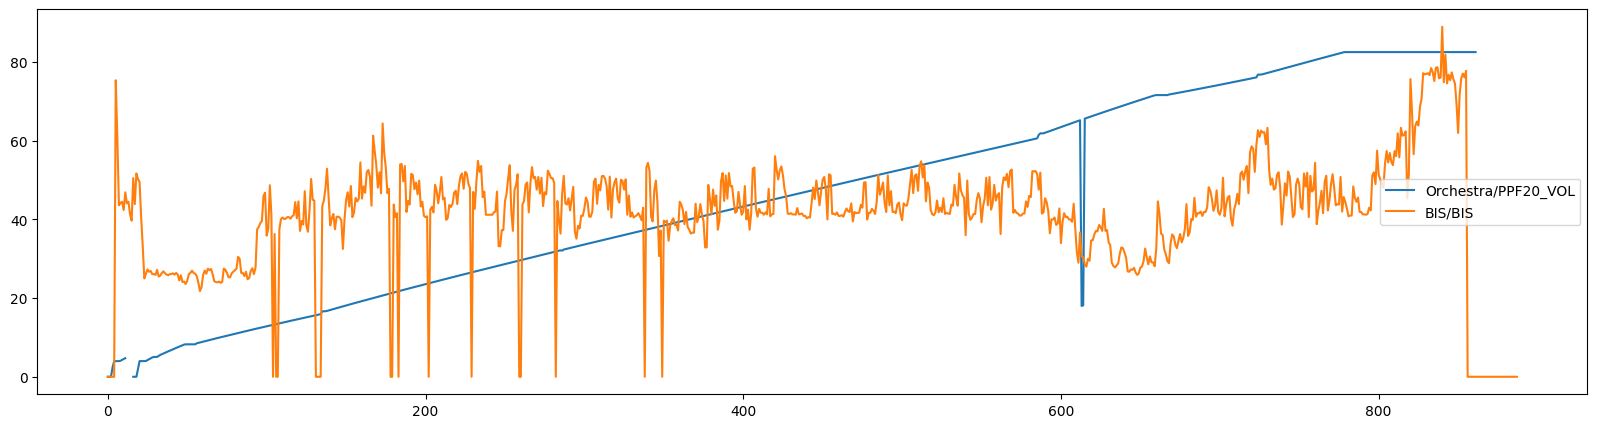

In [ ]:
# 시각화
plt.figure(figsize=(20,5))
for idx, trk in enumerate(tracknames):
  plt.plot(vals[:,idx],label=trk)
plt.legend(loc='center right')
plt.show()

In [ ]:
# 결측치 확인
print(np.isnan(vals).sum(axis=0)) # track
print()
np.where(np.isnan(vals).sum(axis=1) > 0)[0] #time

[30  0]



array([ 12,  13,  14,  15, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883,
       884, 885, 886, 887])

In [ ]:
# track - time별 결측치 확인
for idx, trk in enumerate(tracknames): # tracknames = ['Orchestra/PPF20_VOL', 'BIS/BIS']
  print(f' Missing values of {trk} track at : {np.where(np.isnan(vals[:, idx]))[0]}')
  print()

 Missing values of Orchestra/PPF20_VOL track at : [ 12  13  14  15 862 863 864 865 866 867 868 869 870 871 872 873 874 875
 876 877 878 879 880 881 882 883 884 885 886 887]

 Missing values of BIS/BIS track at : []



In [ ]:
for idx, trk in enumerate(tracknames): # tracknames = ['Orchestra/PPF20_VOL', 'BIS/BIS']
  print(f' Missing values of {trk} track at :\n')
  print(vals[np.isnan(vals[:, idx])])
  print()

 Missing values of Orchestra/PPF20_VOL track at :

[[        nan 44.09999847]
 [        nan 44.5       ]
 [        nan 41.29999924]
 [        nan 39.70000076]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.        ]]

 Missing values of BIS/BIS track at :

[]



In [ ]:
#  결측치 처리 방법1 - 전후 값으로 치환
vals_ = vals[10:20]
print("#"*4, "Original", "#"*4)
print(vals_)
print()
print("#"*4, "Forward filling", "#"*4)
print(pd.DataFrame(vals_).ffill().values)
print()
print("#"*4, "Backward filling", "#"*4)
print(pd.DataFrame(vals_).fillna(method='bfill').values)
print()

#### Original ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [        nan 44.09999847]
 [        nan 44.5       ]
 [        nan 41.29999924]
 [        nan 39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]

#### Forward filling ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 4.71899986 44.09999847]
 [ 4.71899986 44.5       ]
 [ 4.71899986 41.29999924]
 [ 4.71899986 39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]

#### Backward filling ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 0.         44.09999847]
 [ 0.         44.5       ]
 [ 0.         41.29999924]
 [ 0.         39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]



<ipython-input-19-eb009993b44d>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(pd.DataFrame(vals_).fillna(method='bfill').values)


In [ ]:
df_filled = pd.DataFrame(vals_).ffill(limit=3)

print(df_filled)

       0          1
0  4.522  42.400002
1  4.719  46.900002
2  4.719  44.099998
3  4.719  44.500000
4  4.719  41.299999
5    NaN  39.700001
6  0.000  50.500000
7  0.000  43.900002
8  0.000  51.700001
9  1.939  50.299999


In [ ]:
#  결측치 처리 방법2 - 전후 값으로 치환
print("#"*4, "Interpolation", "#"*4)
print(pd.DataFrame(vals_).interpolate().values)

#### Interpolation ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 3.77519989 44.09999847]
 [ 2.83139992 44.5       ]
 [ 1.88759995 41.29999924]
 [ 0.94379997 39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]


In [ ]:
#  결측치 처리 방법3 - 특정값으로 치환
print(np.nan_to_num(vals_, 0))

[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 0.         44.09999847]
 [ 0.         44.5       ]
 [ 0.         41.29999924]
 [ 0.         39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]


*   수치형 데이터: 평균, 중앙값, 또는 예측 모델
*   시계열 데이터: 선형 보간, 전방/후방 채우기, 또는 시계열 예측 모델
*  시계열 데이터의 경우, 시간적 맥락(주기성, 추세) 고려해야 합니다.
*   결측치가 전체 데이터의 5% 미만이면 제거를 고려
*   결측치 처리 방법을 명확히 기록하고 보고











---


2.   데이터셋 구성

*   [약물 효과 예측 인공지능 모델 ]
*   propofol(ppf20), remifentanil(rftn20), bis로 구성된 데이터
*   기록된 데이터가 짧거나, 약물주입 실제 없었던 케이스, bis값이 적절하지 않은 케이스는 거르기
*   결측값 및 음수 처리 주의해보기


---



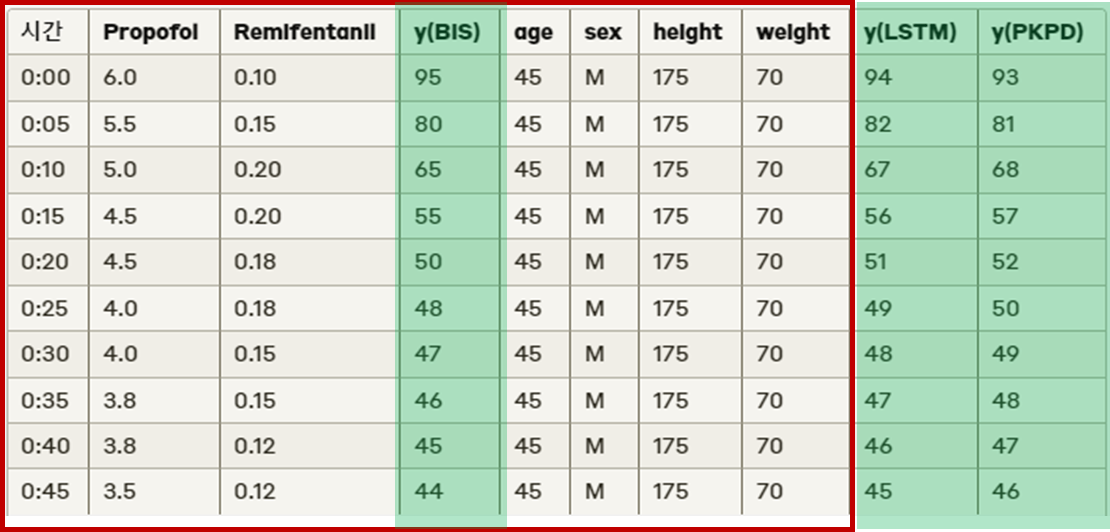

In [ ]:
######### TODO 1 #########

# vital 파일로부터 dataset 을 만듬
x_ppf_dose = []  # 각 레코드의 프로포폴 주입량
x_rft_dose = []  # 각 레코드의 레미펜타닐 주입량
x_aswh = []  # 각 레코드의 나이, 성별, 키, 몸무게
x_caseid = []  # 각 레코드의 caseid
y = []  # 각 레코드의 출력값 (bis)
y_old = []  # 고전적 모델의 예측값

LSTM_TIMEPOINTS = 180
MAX_CASES = 50  # 본 예제에서 사용할 최대 case 수

# 데이터 로딩했을 때 컬럼 순서
PPF_DOSE = 0
RFT_DOSE = 1
PPF_CE = 2
RFT_CE = 3
BIS = 4

icase = 0  # 현재 로딩 중인 케이스 번호
ncase = min(MAX_CASES, len(caseids))
for caseid in caseids:  # 본 연구에 사용할 각 case에 대하여
    print('loading {} ({}/{})'.format(caseid, icase, ncase), end='...', flush=True)

    ######### TODO 1 : Step 1 #########
    # 10초 간격으로, propofol volume, remifentanil volume, propofol CE, remifentanil CE, BIS 데이터 추출
    vals = vitaldb.load_case(caseid, ['Orchestra/PPF20_VOL', 'Orchestra/RFTN20_VOL', 'Orchestra/PPF20_CE', 'Orchestra/RFTN20_CE', 'BIS/BIS'], 10)

    ######### TODO 1 : Step 2 #########
    # 결측값은 마지막 측정되었던 값으로 대체
    vals = pd.DataFrame(vals).ffill().values

    ######### TODO 1 : Step 3 #########
    # Forward fill로 채워지지 않은 맨 앞 쪽 결측값은 0으로 대체
    vals = np.nan_to_num(vals, 0)

    # drug 주입을 하지 않은 case 혹은 bis를 사용하지 않은 case는 제외
    if (np.max(vals, axis=0) <= 1).any():
        print('no drug infusion or bis')
        continue

    # drug infusion 시작 시간을 구하고 그 이전을 삭제
    first_ppf_idx = np.where(vals[:, PPF_DOSE] > 1)[0][0]
    first_rft_idx = np.where(vals[:, RFT_DOSE] > 1)[0][0]
    first_drug_idx = min(first_ppf_idx, first_rft_idx)
    vals = vals[first_drug_idx:, :]

    # volume 을 rate로 변경
    vals[1:, PPF_DOSE] -= vals[:-1, PPF_DOSE] # propofol_volume(누적량)[1,2,3,...,n] - propofol_volume(누적량)[0,1,2,...,n-1]
    vals[1:, RFT_DOSE] -= vals[:-1, RFT_DOSE]
    vals[0, PPF_DOSE] = 0
    vals[0, RFT_DOSE] = 0

    ######### TODO 1 : Step 4 #########
    # vals의 음수 값을 0으로 대체
    vals[vals < 0] = 0

    # bis 값의 첫 값이 80 이하이거나 마지막 값이 70 이하인 case는 사용하지 않음
    valid_bis_idx = np.where(vals[:, BIS] > 0)[0]
    first_bis_idx = valid_bis_idx[0]
    last_bis_idx = valid_bis_idx[-1]
    if vals[first_bis_idx, BIS] < 80:
        print('first bis < 80')
        continue
    if vals[last_bis_idx, BIS] < 70:
        print('last bis < 70')
        continue

    # infusion 시작 전 LSTM_TIMEPOINTS 동안의 dose와 bis를 모두 0으로 세팅
    vals = np.vstack((np.zeros((LSTM_TIMEPOINTS - 1, vals.shape[1])), vals))

    ######### TODO 1 : Step 5 #########
    # 현 case의 나이, 성별, 키, 몸무게를 가져옴
    # female은 1으로, male 은 0으로 치환
    df_cases['sex'] = (df_cases['sex'] == 'F').astype(int)
    aswh = df_cases.loc[df_cases['caseid'] == caseid, ['age','sex','weight','height']]
    aswh = aswh.values.astype(float).flatten()

    # case 시작 부터 종료까지 dataset 에 넣음
    for irow in range(1, vals.shape[0] - LSTM_TIMEPOINTS - 1):
        bis = vals[irow + LSTM_TIMEPOINTS, BIS]
        if bis == 0:
            continue

        # 데이터셋에 입력값을 넣음
        x_ppf_dose.append(vals[irow:irow + LSTM_TIMEPOINTS, PPF_DOSE])
        x_rft_dose.append(vals[irow:irow + LSTM_TIMEPOINTS, RFT_DOSE])

        x_aswh.append(aswh)
        x_caseid.append(caseid)
        y.append(bis / 100)

        ppf_ce = vals[irow + LSTM_TIMEPOINTS, PPF_CE]
        rft_ce = vals[irow + LSTM_TIMEPOINTS, RFT_CE]

        ug = (ppf_ce / 4.47 + rft_ce / 19.3)**1.43
        y_old.append(0.98 - 0.98 * (ug / (1 + ug)))


    # 사용할 case
    print('done')
    icase += 1
    if icase >= ncase:
        break

loading 794 (0/50)...first bis < 80
loading 281 (0/50)...done
loading 3855 (1/50)...done
loading 3757 (2/50)...done
loading 1834 (3/50)...done
loading 1489 (4/50)...first bis < 80
loading 3253 (4/50)...done
loading 3710 (5/50)...done
loading 2042 (6/50)...done
loading 416 (7/50)...first bis < 80
loading 60 (7/50)...done
loading 6352 (8/50)...done
loading 757 (9/50)...done
loading 69 (10/50)...first bis < 80
loading 4453 (10/50)...done
loading 1047 (11/50)...first bis < 80
loading 4020 (11/50)...done
loading 3398 (12/50)...first bis < 80
loading 5077 (12/50)...done
loading 5035 (13/50)...done
loading 5949 (14/50)...done
loading 4662 (15/50)...done
loading 2985 (16/50)...done
loading 3565 (17/50)...done
loading 4975 (18/50)...first bis < 80
loading 1346 (18/50)...done
loading 706 (19/50)...first bis < 80
loading 3706 (19/50)...done
loading 4282 (20/50)...done
loading 5855 (21/50)...done
loading 121 (22/50)...done
loading 4749 (23/50)...done
loading 2835 (24/50)...first bis < 80
loading 5

In [ ]:
# 입력 데이터셋을 numpy array로 변경
x_ppf_dose = np.array(x_ppf_dose)[..., None]  # LSTM 에 넣기 위해서는 3차원이어야 한다. 마지막 차원을 추가
x_rft_dose = np.array(x_rft_dose)[..., None]
x_aswh = np.array(x_aswh)
y = np.array(y)
y_old = np.array(y_old)
x_caseid = np.array(x_caseid)


<ipython-input-28-1ce20029024e>:10: RuntimeWarning: invalid value encountered in divide
  x_aswh = (x_aswh - np.mean(x_aswh, axis=0)) / np.std(x_aswh, axis=0)




---


3.   정규화 및 Train / Test 데이터 나누기


*   Min-Max 정규화 (Min-Max Normalization) :  (X - X_min) / (X_max - X_min)
*   로그 변환 (Log Transformation) : log(X)


---





In [ ]:
# normalize data
x_aswh = (x_aswh - np.mean(x_aswh, axis=0)) / np.std(x_aswh, axis=0)

# 최종적으로 로딩 된 caseid
caseids = np.unique(x_caseid)

ntest = int(ncase * 0.1)
ntrain = ncase - ntest
train_caseids = caseids[:ntrain]
test_caseids = caseids[ntrain:ncase]

# train set과 test set 으로 나눔
train_mask = np.array([caseid in train_caseids for caseid in x_caseid])
test_mask = np.array([caseid in test_caseids for caseid in x_caseid])
x_train = [x_ppf_dose[train_mask], x_rft_dose[train_mask], x_aswh[train_mask]]
y_train = y[train_mask]
x_test = [x_ppf_dose[test_mask], x_rft_dose[test_mask], x_aswh[test_mask]]
y_test = y[test_mask]
y_old = y_old[test_mask]

print('train: {} cases {} samples, testing: {} cases {} samples'.format(len(train_caseids), np.sum(train_mask), len(test_caseids), np.sum(test_mask)))


train: 45 cases 56174 samples, testing: 5 cases 7037 samples


## [3] 인공지능 모델 생성 및 확인


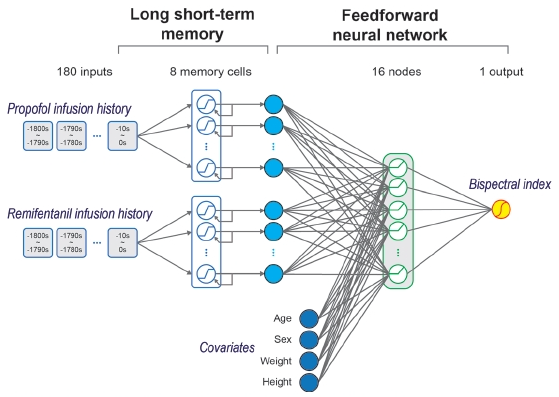

In [ ]:
from keras.models import Model, load_model
from keras.layers import Dense, Dropout, LSTM, Input, concatenate
from keras.callbacks import EarlyStopping
import tensorflow as tf

# 모델 설계

def build_model(LSTM_NODES, FNN_NODES, DROP_RATE):

    input_cov = Input(shape=(4,))
    input_ppf = Input(shape=(LSTM_TIMEPOINTS, 1))
    input_rft = Input(shape=(LSTM_TIMEPOINTS, 1))
    output_ppf = LSTM(LSTM_NODES, activation='tanh')(input_ppf)
    output_rft = LSTM(LSTM_NODES, activation='tanh')(input_rft)
    output = concatenate([output_ppf, output_rft, input_cov])
    output = Dense(FNN_NODES)(output)
    output = Dropout(DROP_RATE)(output)
    output = Dense(1, activation='sigmoid')(output)
    model = Model(inputs=[input_ppf, input_rft, input_cov], outputs=[output])

    return model

# 모델 생성 및 구조 확인
model = build_model(32, 32, 0.5)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 180, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 180, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 32)             │          4,352 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 32)             │          4,352 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 68)             │              0 │ lstm_2[0][0],          │
│ (Concatenate)             │                        │                │ lstm_3[0][0],          │
│                           │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,208 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             33 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,945 (42.75 KB)

 Trainable params: 10,945 (42.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
mape = tf.keras.losses.MeanAbsolutePercentageError()

model.compile(loss=mse, optimizer='sgd', metrics=[mape])
hist = model.fit(x_train, y_train,
                 batch_size=64,
                 validation_split=0.2,
                 epochs=1,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')])

In [ ]:
# 예측
y_pred = model.predict(x_test).flatten()
print(f"Test MAPE (LSTM): {mape(y_test, y_pred):.1f}%")
print(f"Test MAPE (Short): {mape(y_old, y_pred):.1f}%")
print()

# 각 case에서 예측 결과를 그림으로 확인
import matplotlib.pyplot as plt
for caseid in test_caseids:
    case_mask = (x_caseid[test_mask] == caseid)
    case_len = np.sum(case_mask)
    if case_len == 0:
        continue

    print('CaseID {}, LSTM MAPE={}, Short MAPE={}'.format(caseid,
      mape(y_test[case_mask], y_pred[case_mask]),
      mape(y_test[case_mask], y_old[case_mask])
      ))

    t = np.arange(0, case_len)
    plt.figure(figsize=(20, 5))
    plt.plot(t, y_test[case_mask], label='BIS')  # 측정 결과
    plt.plot(t, y_pred[case_mask], label='LSTM')  # LSTM model
    plt.plot(t, y_old[case_mask], label='Short')  # Short model
    plt.legend()
    plt.xlim([0, case_len])
    plt.ylim([0, 1])
    plt.show()



## + 추가 인공지능 모델 실험

In [ ]:
######### TODO 2 #########
# 모델 설계 및 학습

######### TODO 2 : Step 1 #########
# LSTM의 node 수 8, FNN의 node 수 16, dropout rate는 0.2인 모델을 만들어주세요.
model = build_model(8, 16, 0.2)

######### TODO 2 : Step 2 #########
# 손실함수는 mean absolute error, 옵티마이저는 Adam, 평가방법은 mean absolute percentage error로 모델을 컴파일 해주세요.
mae = tf.keras.losses.MeanAbsoluteError()
mape = tf.keras.losses.MeanAbsolutePercentageError()
model.compile(loss=mae, optimizer='adam', metrics=[mape])

######### TODO 2 : Step 3 #########
# 모델 검증을 위해 10%로 split해서 미니배치 크기는 256으로 모델을 epoch은 10회로 학습해주세요.
hist = model.fit(x_train, y_train,
                 validation_split=0.1,
                 epochs=10,
                 batch_size=256)


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 132ms/step - loss: nan - mean_absolute_percentage_error: nan - val_loss: nan - val_mean_absolute_percentage_error: nan
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 35s 102ms/step - loss: nan - mean_absolute_percentage_error: nan - val_loss: nan - val_mean_absolute_percentage_error: nan
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - loss: nan - mean_absolute_percentage_error: nan - val_loss: nan - val_mean_absolute_percentage_error: nan
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - loss: nan - mean_absolute_percentage_error: nan - val_loss: nan - val_mean_absolute_percentage_error: nan
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - loss: nan - mean_absolute_percentage_error: nan - val_loss: nan - val_mean_absolute_percentage_error: nan
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - loss: nan - mean_absolute_percentage_error: nan - val_loss: nan - val_mean_absolute_percentage_error: nan
Epoch 7/10
198/198 ━━━

In [ ]:
# 예측
y_pred = model.predict(x_test).flatten()
print(f"Test MAPE (LSTM): {mape(y_test, y_pred):.1f}%")
print(f"Test MAPE (Short): {mape(y_old, y_pred):.1f}%")
print()

# 각 case에서 예측 결과를 그림으로 확인
import matplotlib.pyplot as plt
for caseid in test_caseids:
    case_mask = (x_caseid[test_mask] == caseid)
    case_len = np.sum(case_mask)
    if case_len == 0:
        continue

    print('CaseID {}, LSTM MAPE={}, Short MAPE={}'.format(caseid,
      mape(y_test[case_mask], y_pred[case_mask]),
      mape(y_test[case_mask], y_old[case_mask])
      ))

    t = np.arange(0, case_len)
    plt.figure(figsize=(20, 5))
    plt.plot(t, y_test[case_mask], label='BIS')  # 측정 결과
    plt.plot(t, y_pred[case_mask], label='LSTM')  # LSTM model
    plt.plot(t, y_old[case_mask], label='Short')  # Short model
    plt.legend()
    plt.xlim([0, case_len])
    plt.ylim([0, 1])
    plt.show()

## More examples
More examples using clinical information data in VitalDB are as below.


* https://github.com/vitaldb/examples/blob/master/asa_mortality.ipynb
* https://github.com/vitaldb/examples/blob/master/predict_mortality.ipynb
* https://github.com/vitaldb/examples/blob/master/ppf_bis.ipynb